In [8]:
!pip install category_encoders
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
import re
from scipy import stats

In [9]:
# Configuration de l'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
plt.style.use('ggplot')

In [10]:

# Charger les deux fichiers CSV
df_mubawab = pd.read_csv('mubawab_properties.csv')
df_avito = pd.read_csv('avito_properties.csv')



In [11]:
# Afficher les premières lignes pour les visualiser
print("Données Mubawab:")
display(df_mubawab.head())
print("\nDonnées Avito:")
display(df_avito.head())

Données Mubawab:


,id,url,title,price,location,type,area,rooms,bedrooms,bathrooms,description,property_state,jardin,piscine,cuisine_equiped,terrasse,garage,ascenseur,quartier,status
0,6357490,https://www.mubawab.ma/fr/a/6357490/luxueuse-v...,NaN,14000000.0,NaN,villa,550.0,6.0,5.0,4.0,NaN,Moins d'un an,Oui,Oui,Oui,Oui,Oui,Non,Souissi à\n\t\t\t\t\t\t\tRabat,success
1,6829872,https://www.mubawab.ma/fr/a/6829872/bel-appart...,NaN,1980000.0,NaN,appartement,107.0,3.0,2.0,1.0,NaN,NaN,Non,Non,Non,Oui,Non,Non,Agdal à\n\t\t\t\t\t\t\tRabat,success
2,6897023,https://www.mubawab.ma/fr/a/6897023/villa-comm...,NaN,8900000.0,NaN,villa,791.0,8.0,5.0,3.0,NaN,20-30 ans,Oui,Oui,Non,Oui,Non,Non,Riyad à\n\t\t\t\t\t\t\tRabat,success
3,6984102,https://www.mubawab.ma/fr/a/6984102/vente-pala...,NaN,120000000.0,NaN,NaN,4800.0,22.0,10.0,5.0,NaN,NaN,Non,Oui,Oui,Non,Oui,Oui,Souissi à\n\t\t\t\t\t\t\tRabat,success
4,7002092,https://www.mubawab.ma/fr/a/7002092/vente-vill...,NaN,7500000.0,NaN,villa,622.0,8.0,4.0,4.0,NaN,NaN,Oui,Oui,Non,Non,Non,Non,Riyad à\n\t\t\t\t\t\t\tRabat,success



Données Avito:


,id,url,title,price,location,type,area,rooms,bedrooms,bathrooms,description,property_state,jardin,piscine,cuisine_equiped,terrasse,garage,ascenseur,quartier,status
0,NaN,https://www.avito.ma/fr/aakkari/appartements/%...,شقة للبيع بمدينة الرباط,200000.0,"Aakkari, Rabat","Appartements, à vendre",NaN,NaN,NaN,NaN,شقة للبيع بمدينة الرباط,NaN,False,False,False,False,False,False,Aakkari,à vendre
1,NaN,https://www.avito.ma/fr/aakkari/appartements/%...,شقتين للبيع,580000.0,"Aakkari, Rabat","Appartements, à vendre",NaN,NaN,NaN,NaN,شقتين مسجلة و محفضة مساحة 107 متر فيهوم بجوج ا...,NaN,False,False,False,False,False,False,Aakkari,à vendre
2,NaN,https://www.avito.ma/fr/aakkari/appartements/A...,Appartement à vendre 1000 m² à Rabat,NaN,"Aakkari, Rabat","Appartements, à vendre",1000.0,NaN,NaN,NaN,un chien maniloi charboune\nage : 9moins\ncoup...,NaN,False,False,False,False,False,False,Aakkari,à vendre
3,NaN,https://www.avito.ma/fr/aakkari/appartements/A...,Appartement à vendre 115 m² à Rabat,1402500.0,"Aakkari, Rabat","Appartements, à vendre",115.0,NaN,NaN,NaN,الإعلان عن عقار للبيع وهو عبارة عن بناية مكونة...,NaN,False,False,False,False,False,False,Aakkari,à vendre
4,NaN,https://www.avito.ma/fr/aakkari/appartements/A...,Appartement à vendre 190 m² à Rabat,NaN,"Aakkari, Rabat","Appartements, à vendre",190.0,NaN,NaN,NaN,"Situé à Qbibat Aakkari, une belle appartement ...",NaN,False,False,False,True,True,True,Aakkari,à vendre


In [12]:
def explore_dataset(df, title):
    print(f"Shape: {df.shape}")
    print(df.info())
    print("\nDescriptive Statistics:")
    print(df.describe().T)
    print("\nMissing Values:")
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_data = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percent})
    print(missing_data[missing_data['Missing Values'] > 0])

# Explorer les deux datasets
explore_dataset(df_mubawab, "Dataset Mubawab")
explore_dataset(df_avito, "Dataset Avito")

Shape: (1165, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1165 non-null   int64  
 1   url              1165 non-null   object 
 2   title            0 non-null      float64
 3   price            1067 non-null   float64
 4   location         0 non-null      float64
 5   type             1018 non-null   object 
 6   area             1156 non-null   float64
 7   rooms            1141 non-null   float64
 8   bedrooms         1158 non-null   float64
 9   bathrooms        1157 non-null   float64
 10  description      0 non-null      float64
 11  property_state   667 non-null    object 
 12  jardin           1165 non-null   object 
 13  piscine          1165 non-null   object 
 14  cuisine_equiped  1165 non-null   object 
 15  terrasse         1165 non-null   object 
 16  garage           1165 non-null   object 
 

In [13]:
# Sélection des colonnes pertinentes
columns_to_keep = ['price', 'type', 'area', 'rooms', 'bedrooms', 'bathrooms',
                  'property_state', 'jardin', 'piscine', 'cuisine_equiped',
                  'terrasse', 'garage', 'quartier']

In [14]:
# Vérifier si toutes les colonnes existent dans les deux dataframes
for col in columns_to_keep:
    for df_name, df in zip(['Mubawab', 'Avito'], [df_mubawab, df_avito]):
        if col not in df.columns:
            print(f"Colonne '{col}' manquante dans {df_name}")

In [15]:
# Filtrer les colonnes
df_mubawab_filtered = df_mubawab[columns_to_keep].copy()
df_avito_filtered = df_avito[columns_to_keep].copy()

In [16]:
df_mubawab_filtered['quartier'] = (
    df_mubawab_filtered['quartier']
    .astype(str)  # Convertit tout en chaîne (gère les NaN)
    .str.replace(r'\s+[àa]\s+Rabat$', '', regex=True)  # Supprime " à Rabat", " a Rabat" en fin de ligne
    .str.strip()  # Enlève les espaces résiduels
)
print(df_mubawab_filtered['quartier'].unique())
print(df_mubawab_filtered['quartier'].unique())

['Souissi' 'Agdal' 'Riyad' 'Quartier Des Ambassades' 'Rabat' 'Hay Nahda'
 'Médina' 'Diour Jamaa' "L'Ocean" 'Hassan - Centre Ville' 'Les Orangers'
 'Haut Agdal' 'Aviation - Mabella' 'Guich Oudaya' 'El Youssoufia' 'Akkari'
 'Karrakchou' 'Hay Al Fath' 'Les Oudayas' 'Kébibat' 'Abi Ragrag'
 'Al Kamra' 'Hay Al Kora' 'Hay El Menzah' 'Quartier Administratif'
 'Hay Al Massira' 'Riyad Extension' 'Al Kouass' 'Hay Bouhlal'
 'Hay Ach-chbanat' 'Hay Al Amal' 'Mechouar' 'Sidi Yahya Zaer' 'Bouitate'
 'Al Irfane' 'Hay Al Farah' 'nan' 'Skhirat' 'Takadoum'
 'Hay Al Rajaa Fillah' 'Hay Achchabab' 'Al Saha Al Kabira']
['Souissi' 'Agdal' 'Riyad' 'Quartier Des Ambassades' 'Rabat' 'Hay Nahda'
 'Médina' 'Diour Jamaa' "L'Ocean" 'Hassan - Centre Ville' 'Les Orangers'
 'Haut Agdal' 'Aviation - Mabella' 'Guich Oudaya' 'El Youssoufia' 'Akkari'
 'Karrakchou' 'Hay Al Fath' 'Les Oudayas' 'Kébibat' 'Abi Ragrag'
 'Al Kamra' 'Hay Al Kora' 'Hay El Menzah' 'Quartier Administratif'
 'Hay Al Massira' 'Riyad Extension' 'Al Koua

In [17]:
# Fonctions de nettoyage
def clean_price(price):
    if isinstance(price, str):
        # Supprimer espaces, points et symboles monétaires
        price = re.sub(r'[^\d,]', '', price)
        # Remplacer la virgule par un point si nécessaire
        price = price.replace(',', '.')
        try:
            return float(price)
        except:
            return np.nan
    elif isinstance(price, (int, float)):
        return float(price)
    return np.nan


def convert_boolean(value):
    if isinstance(value, str):
        if value.lower() in ['0ui','True','1']:
            return 1
        elif value.lower() in ['Non','False','0']:
            return 0
    elif isinstance(value, (int, float)):
        return 1 if value > 0 else 0
    return 0  # Par défaut

In [18]:
# Appliquer les fonctions de nettoyage
for df in [df_mubawab_filtered, df_avito_filtered]:
    df['price'] = df['price'].apply(clean_price)
    df['area'] = df['area'].apply(lambda x: float(str(x).replace(',', '.')) if isinstance(x, (str, int, float)) else np.nan)

    # Conversion des booléens
    boolean_cols = ['jardin', 'piscine', 'cuisine_equiped', 'terrasse', 'garage']
    for col in boolean_cols:
        if col in df.columns:
            df[col] = df[col].apply(convert_boolean)

    # Conversion des types
    for col in ['rooms', 'bedrooms', 'bathrooms']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')


In [20]:

def remove_outliers_iqr(df, column):
    if df[column].dtypes != 'object':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# Appliquer la détection d'outliers sur les prix et surfaces
df_mubawab_filtered = remove_outliers_iqr(df_mubawab_filtered, 'price')
df_mubawab_filtered = remove_outliers_iqr(df_mubawab_filtered, 'area')
df_avito_filtered = remove_outliers_iqr(df_avito_filtered, 'price')
df_avito_filtered = remove_outliers_iqr(df_avito_filtered, 'area')

In [21]:
print("Valeurs max Mubawab:", df_mubawab_filtered['price'].max())
print("Valeurs max Avito:", df_avito_filtered['price'].max())

Valeurs max Mubawab: 17600000.0
Valeurs max Avito: 8000000.0


In [22]:
from sklearn.impute import KNNImputer
def impute_with_knn(df, target_column, feature_columns, n_neighbors=5):
    # Créer un sous-dataframe avec uniquement les colonnes nécessaires
    df_impute = df[feature_columns + [target_column]].copy()

    # Encoder les variables catégorielles si présentes
    categorical_cols = df_impute.select_dtypes(include=['object']).columns.tolist()
    if categorical_cols:
        df_impute = pd.get_dummies(df_impute, columns=categorical_cols, drop_first=True)

    # Identifier les lignes avec des valeurs manquantes dans la colonne cible
    missing_mask = df_impute[target_column].isna()
    df_missing = df_impute[missing_mask].copy()
    df_complete = df_impute[~missing_mask].copy()

    if len(df_complete) > 0 and len(df_missing) > 0:
        # Initialiser et entraîner l'imputeur KNN
        imputer = KNNImputer(n_neighbors=n_neighbors)
        imputer.fit(df_complete)

        # Imputer les valeurs manquantes
        df_imputed = pd.DataFrame(imputer.transform(df_impute), columns=df_impute.columns)

        # Mettre à jour uniquement les valeurs manquantes dans la colonne cible
        df.loc[missing_mask, target_column] = df_imputed.loc[missing_mask.values, target_column].values

    return df

# Imputation de la surface (area)
area_features = ['type', 'quartier', 'property_state', 'rooms', 'bedrooms', 'bathrooms']
available_features = [col for col in area_features if col in df_mubawab_filtered.columns]
df_mubawab_filtered = impute_with_knn(df_mubawab_filtered, 'area', available_features)

available_features = [col for col in area_features if col in df_avito_filtered.columns]
df_avito_filtered = impute_with_knn(df_avito_filtered, 'area', available_features)

In [23]:
# Imputation de la surface (area)
area_features = ['type', 'quartier', 'property_state', 'rooms', 'bedrooms', 'bathrooms']
available_features = [col for col in area_features if col in df_mubawab_filtered.columns]
df_mubawab_filtered = impute_with_knn(df_mubawab_filtered, 'area', available_features)

available_features = [col for col in area_features if col in df_avito_filtered.columns]
df_avito_filtered = impute_with_knn(df_avito_filtered, 'area', available_features)

# Imputation du prix
price_features = ['type', 'quartier', 'property_state', 'area', 'rooms', 'bedrooms', 'bathrooms',
                 'jardin', 'piscine', 'cuisine_equiped', 'terrasse', 'garage']
available_features = [col for col in price_features if col in df_mubawab_filtered.columns]
df_mubawab_filtered = impute_with_knn(df_mubawab_filtered, 'price', available_features)

available_features = [col for col in price_features if col in df_avito_filtered.columns]
df_avito_filtered = impute_with_knn(df_avito_filtered, 'price', available_features)

In [24]:
# Supprimer les lignes restantes avec valeurs manquantes dans price ou area
df_mubawab_filtered = df_mubawab_filtered.dropna(subset=['price', 'area'])
df_avito_filtered = df_avito_filtered.dropna(subset=['price', 'area'])

In [25]:
# Création d'une nouvelle variable: prix au m²
df_mubawab_filtered['price_per_m2'] = df_mubawab_filtered['price'] / df_mubawab_filtered['area']
df_avito_filtered['price_per_m2'] = df_avito_filtered['price'] / df_avito_filtered['area']

In [27]:
# Suppression des valeurs aberrantes pour price_per_m2
df_mubawab_filtered = remove_outliers_iqr(df_mubawab_filtered, 'price_per_m2')
df_avito_filtered = remove_outliers_iqr(df_avito_filtered, 'price_per_m2')

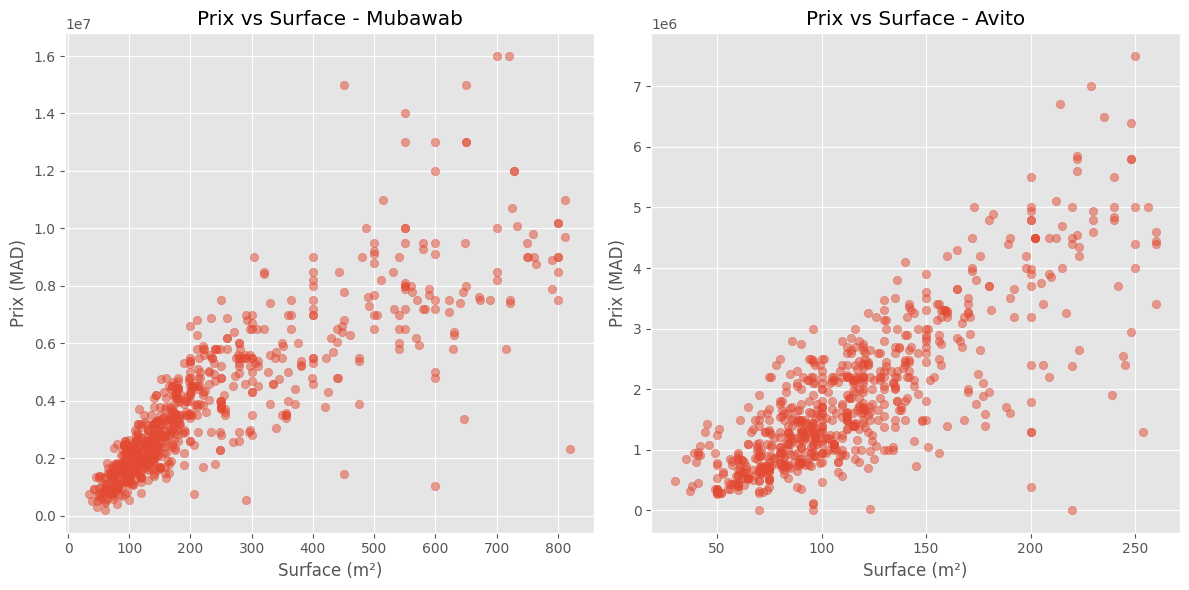

In [28]:
# Visualiser la relation entre prix et surface
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_mubawab_filtered['area'], df_mubawab_filtered['price'], alpha=0.5)
plt.title('Prix vs Surface - Mubawab')
plt.xlabel('Surface (m²)')
plt.ylabel('Prix (MAD)')

plt.subplot(1, 2, 2)
plt.scatter(df_avito_filtered['area'], df_avito_filtered['price'], alpha=0.5)
plt.title('Prix vs Surface - Avito')
plt.xlabel('Surface (m²)')
plt.ylabel('Prix (MAD)')

plt.tight_layout()
plt.show()

In [29]:
# Feature engineering supplémentaire
for df in [df_mubawab_filtered, df_avito_filtered]:
    # Ratio pièces/surface
    df['rooms_per_area'] = df['rooms'] / df['area']

    # Ratio chambres/salles de bain
    df['bed_bath_ratio'] = df['bedrooms'] / df['bathrooms']
    df['bed_bath_ratio'] = df['bed_bath_ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

    # Score d'équipement (somme des équipements)
    equipment_cols = ['jardin', 'piscine', 'cuisine_equiped', 'terrasse', 'garage']
    df['equipment_score'] = df[equipment_cols].sum(axis=1)

    # Transformation logarithmique du prix (pour distribution plus normale)
    df['log_price'] = np.log1p(df['price'])

In [42]:
# Fusion des deux datasets
df_combined = pd.concat([df_mubawab_filtered, df_avito_filtered], ignore_index=True)

# Réordonner les colonnes du DataFrame combiné
df_combined = df_combined.reindex(columns=[col for col in column_order if col in df_combined.columns])

# Standardisation des variables numériques
print("Standardisation des variables numériques...")

# Identifier les colonnes numériques (à l'exception de la variable cible et ses dérivés)
numeric_cols = df_combined.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['price', 'log_price']]

# Appliquer la standardisation
scaler = StandardScaler()
df_combined[numeric_cols] = scaler.fit_transform(df_combined[numeric_cols])

# Encodage One-Hot pour les variables à petit nombre de catégories
df_combined = pd.get_dummies(df_combined, columns=['type', 'property_state'], drop_first=True)

# Target Encoding pour les quartiers (nombreuses catégories)
encoder = TargetEncoder()
df_combined['quartier_encoded'] = encoder.fit_transform(df_combined['quartier'], df_combined['price'])

Standardisation des variables numériques...


In [43]:
df_mubawab_clean = df_mubawab_filtered.reindex(columns=[col for col in column_order if col in df_mubawab_filtered.columns])
df_avito_clean = df_avito_filtered.reindex(columns=[col for col in column_order if col in df_avito_filtered.columns])

In [44]:
# Information sur le dataset final
print(f"Dimensions du dataset final: {df_combined.shape}")
print(f"Nombre d'observations par source: Mubawab ({len(df_mubawab_clean)}), Avito ({len(df_avito_clean)})")

Dimensions du dataset final: (1529, 32)
Nombre d'observations par source: Mubawab (803), Avito (726)


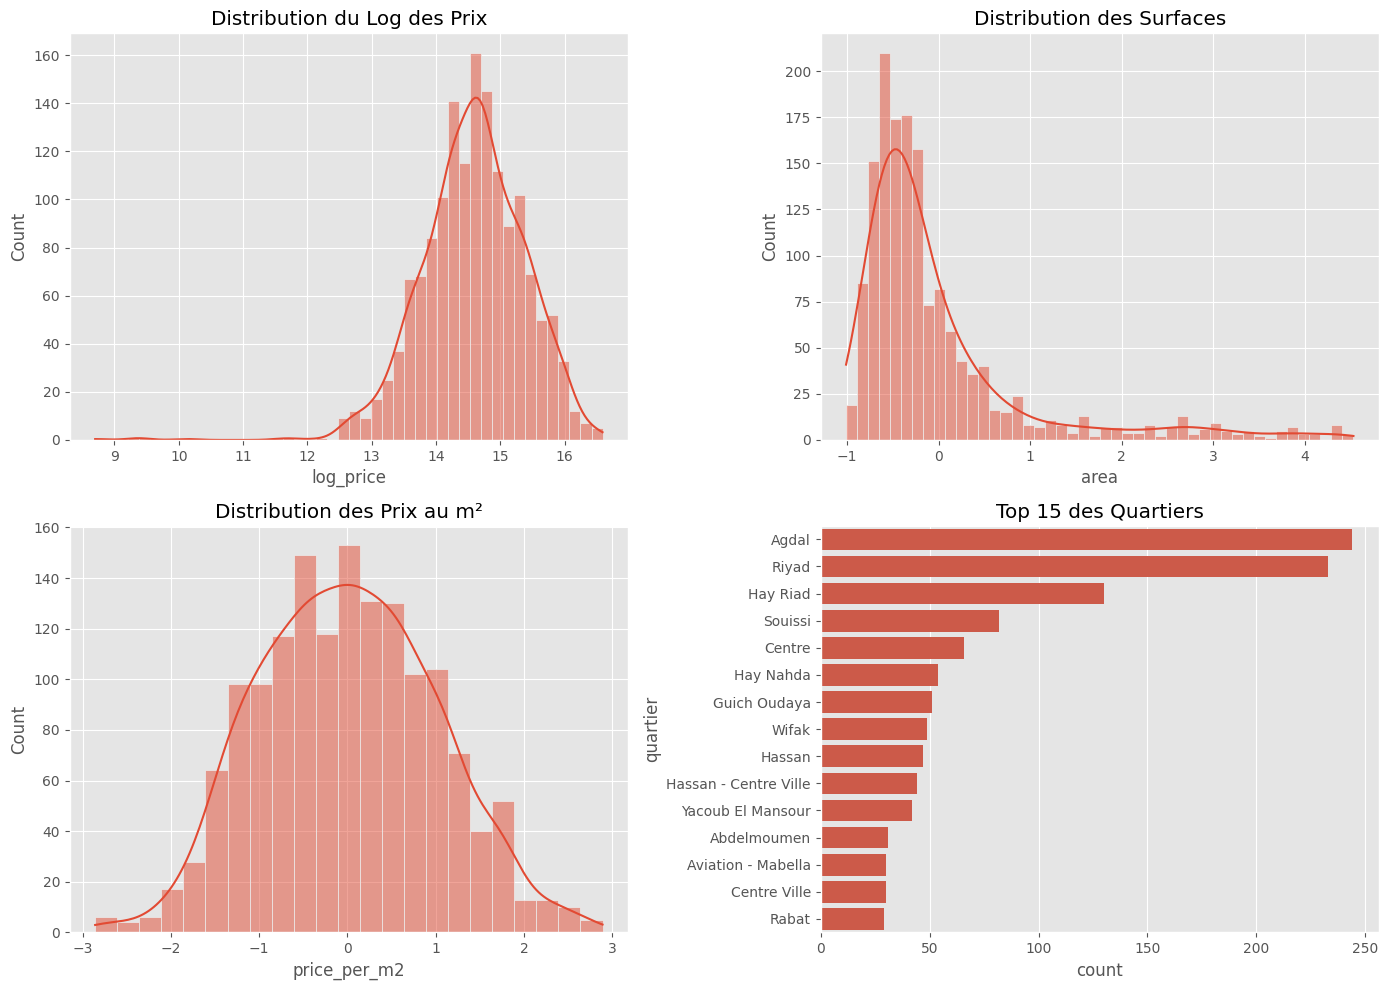

In [45]:
# Vérification de la distribution finale des variables clés
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df_combined['log_price'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution du Log des Prix')

sns.histplot(df_combined['area'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution des Surfaces')

sns.histplot(df_combined['price_per_m2'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution des Prix au m²')

sns.countplot(y=df_combined['quartier'], ax=axes[1, 1], order=df_combined['quartier'].value_counts().index[:15])
axes[1, 1].set_title('Top 15 des Quartiers')

plt.tight_layout()
plt.show()

In [46]:
# Sauvegarde des dataset

df_combined.to_csv('data_cleaned.csv', index=False)

print("Prétraitement terminé avec succès!")

Prétraitement terminé avec succès!


### Au final, à partir d’environ 5000 annonces, nous sommes arrivés à 1529 annonces après nettoyage.